In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [2]:
base_dir = '/Users/TrentHenry/Documents/Trent_PhD/2023_2024_Year_2/Spring 2024/CMSE 890/Project/'
train_dir = os.path.join(base_dir, '')  # Assuming the training data is directly in the base directory with 'open' and 'close' subdirectories

# If you have separate directories for training, validation, or testing, set them up similarly.


In [3]:
batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # using 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # set as validation data
)


Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 'sigmoid' for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [5]:
epochs = 10  # Start with a small number of epochs and adjust based on performance
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
15/15 [==============================] - 7s 458ms/step - loss: -1314.2434 - accuracy: 0.4604 - val_loss: -10785.1357 - val_accuracy: 0.4688
Epoch 2/10
15/15 [==============================] - 7s 442ms/step - loss: -66980.7500 - accuracy: 0.5000 - val_loss: -324178.5938 - val_accuracy: 0.4896
Epoch 3/10
15/15 [==============================] - 7s 442ms/step - loss: -1017964.8125 - accuracy: 0.5000 - val_loss: -3292011.7500 - val_accuracy: 0.5104
Epoch 4/10
15/15 [==============================] - 7s 443ms/step - loss: -8250702.0000 - accuracy: 0.5000 - val_loss: -20687152.0000 - val_accuracy: 0.5000
Epoch 5/10
15/15 [==============================] - 7s 443ms/step - loss: -40020372.0000 - accuracy: 0.5000 - val_loss: -93970024.0000 - val_accuracy: 0.5104
Epoch 6/10
15/15 [==============================] - 7s 445ms/step - loss: -149668944.0000 - accuracy: 0.5000 - val_loss: -327637280.0000 - val_accuracy: 0.4896
Epoch 7/10
15/15 [==============================] - 7s 446ms/step

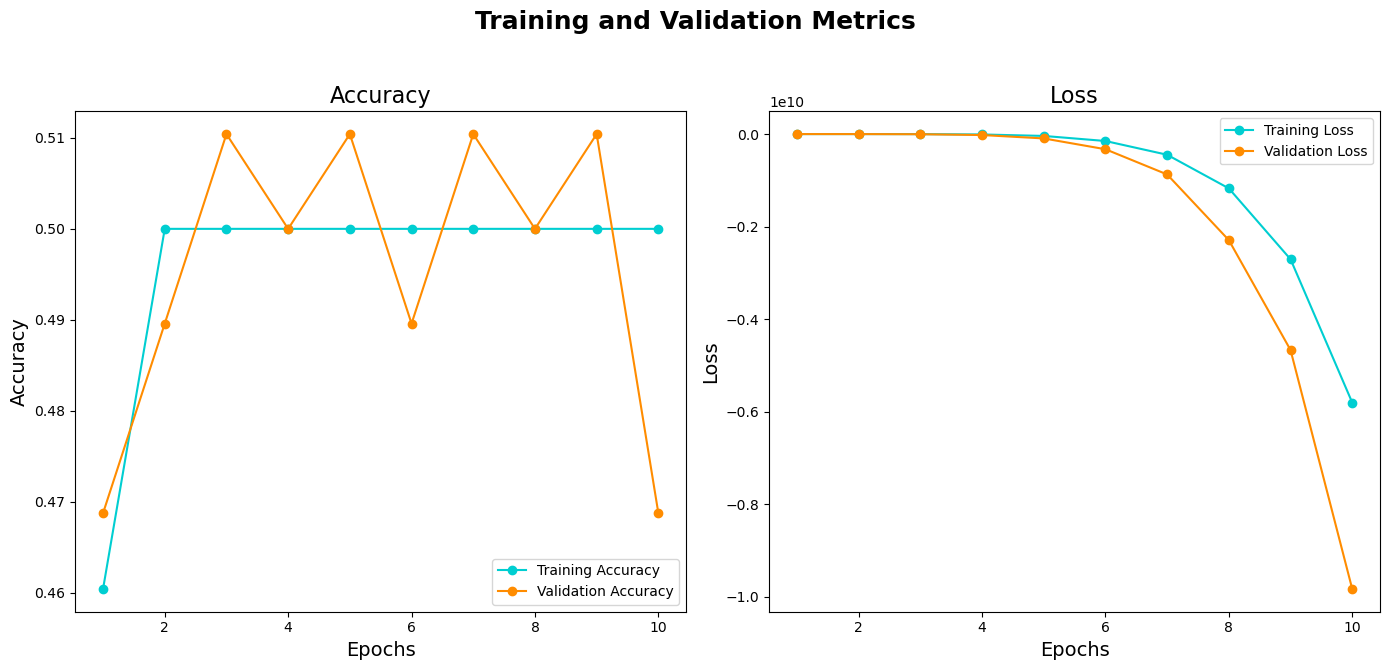

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Assuming 'history' is the result from model.fit()
epochs = range(1, len(history.history['accuracy']) + 1)

# Setup for the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Data for plots
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Title for the figure
fig.suptitle('Training and Validation Metrics', fontsize=18, fontweight='bold')

# Accuracy plot
ax[0].plot(epochs, train_acc, 'o-', color="darkturquoise", label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'o-', color="darkorange", label='Validation Accuracy')
ax[0].set_title('Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].legend(loc='best')

# Loss plot
ax[1].plot(epochs, train_loss, 'o-', color="darkturquoise", label='Training Loss')
ax[1].plot(epochs, val_loss, 'o-', color="darkorange", label='Validation Loss')
ax[1].set_title('Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Loss', fontsize=14)
ax[1].legend(loc='best')

# Improve layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# To save the figure
fig.savefig("TrainingValidationMetrics.png")


In [7]:
model.save('MRI_CNN.keras')
model.save("MRI_CNN.h5")

NameError: name 'X_test' is not defined

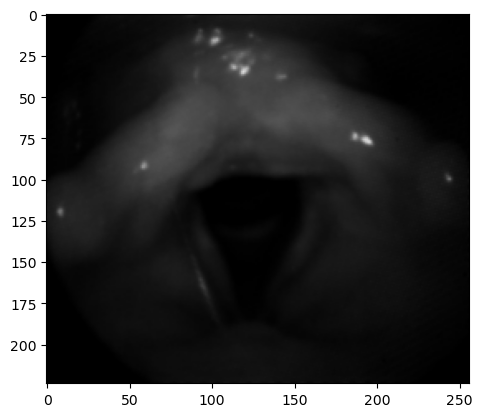

In [8]:
# !pip install opencv-python
import cv2
img = cv2.imread('test.png')
plt.imshow(img)
plt.show()

In [9]:
import numpy as np
# yhat = model.predict(np.expand_dims(resize/255, 0))

In [11]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def classify_image(img_array):
    predictions = CNN_model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return predicted_class, predictions[0]

In [13]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def classify_image(img_array):
    predictions = CNN_model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return predicted_class, predictions[0]

def display_image(img_path):
    img = Image.open(img_path)
    img.show()

# Assuming 'test.png' is in the current working directory
uploaded_file = 'test.png'

# Display the uploaded image
# display_image(uploaded_file)

# Preprocess the image
img_array = preprocess_image(uploaded_file)

# Make predictions
predicted_class, confidence_scores = classify_image(img_array)

# Display the result
class_labels = ["open", "close"]
print(f"The model predicts this image as: {class_labels[predicted_class]}")
print("Confidence Scores:")
for i, score in enumerate(confidence_scores):
    print(f"Class {i} ({class_labels[i]}): {score:.2%}")

NameError: name 'image' is not defined

In [19]:
def preprocess_image(img_path):
    # Read the image using cv2
    img = cv2.imread(img_path)
    # Resize the image to the target size
    img = cv2.resize(img, (224, 224))
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Expand dimensions and normalize
    img_array = np.expand_dims(img, axis=0) / 255.0
    return img_array

def classify_image(img_array):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return predicted_class, predictions[0]

# Assuming 'test.png' is in the current working directory
uploaded_file = 'figure_1.jpg'

# Preprocess the image
img_array = preprocess_image(uploaded_file)

# Make predictions
predicted_class, confidence_scores = classify_image(img_array)

# Display the result
class_labels = ["open", "close"]
print(f"The model predicts this image as: {class_labels[predicted_class]}")
print("Confidence Scores:")
for i, score in enumerate(confidence_scores):
    print(f"Class {i} ({class_labels[i]}): {score:.2%}")

1/1 [==============================] - 0s 29ms/step
The model predicts this image as: open
Confidence Scores:
Class 0 (open): 100.00%


In [20]:
img = cv2.imread('figure_1.jpg')

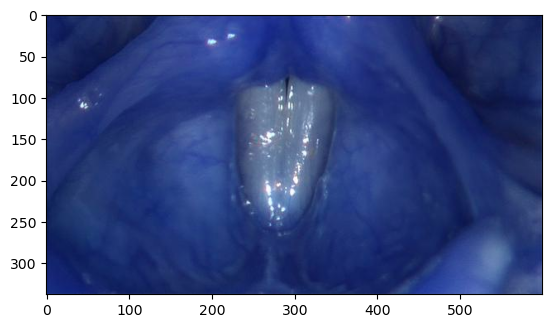

In [18]:
plt.imshow(img)
plt.show()